In [1]:
import numpy as np
from sklearn.decomposition import PCA
from numpy.linalg import svd
from matplotlib import pyplot as plt

In [2]:
# X = np.array([[0, 1, 0, -1], [0, 0, 1, -1]]) # dataset for ex in slides
# X = np.array([[0, 1, 2, -3], [-3, 1, 1, 1]]) # dataset for final practice in slides
X = np.array([[1, -2, 1, 0], [0, -1, -2, 3]]) # dataset for canvas

In [3]:
X @ X.T

array([[ 6,  0],
       [ 0, 14]])

In [4]:
U, s, VT = svd(X)
print("\n U = \n", U)
print("\n s = \n", s)
print("\n VT = \n", VT)


 U = 
 [[0. 1.]
 [1. 0.]]

 s = 
 [3.74165739 2.44948974]

 VT = 
 [[ 1.17260226e-16 -2.67261242e-01 -5.34522484e-01  8.01783726e-01]
 [ 4.08248290e-01 -8.16496581e-01  4.08248290e-01  0.00000000e+00]
 [-7.52641195e-01 -9.81442067e-02  5.56352782e-01  3.38187119e-01]
 [ 5.16589357e-01  5.02267336e-01  4.87945314e-01  4.92719321e-01]]


In [5]:
s ** 2

array([14.,  6.])

In [6]:
pca = PCA()
pca.fit(X.T)

# principal components
print(pca.components_)
print()

[[ 0.  1.]
 [-1. -0.]]



In [7]:
# singula values
print(pca.singular_values_)

[3.74165739 2.44948974]


In [8]:
c = pca.explained_variance_
print(c)
print()
print(np.sqrt(c))

[4.66666667 2.        ]

[2.1602469  1.41421356]


We did not divide any matrix by (n-1), so the numbers above are not equal to singular values or to their squares. 

(-2.15, 1.15, -2.25, 3.25)

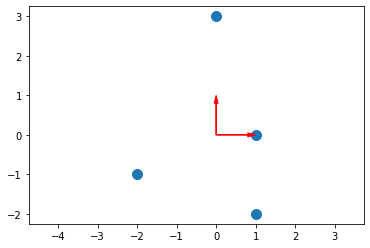

In [9]:
plt.scatter(X[0,:], X[1,:], s=100, marker='o')
plt.arrow(0, 0, U[0][0], U[0][1], color='r', head_length=.2, head_width=.1, length_includes_head=True)
plt.arrow(0, 0, U[1][0], U[1][1], color='r', head_length=.2, head_width=.1, length_includes_head=True)
plt.axis('equal')

(-1.25, 4.25, -4.2, 0.2)

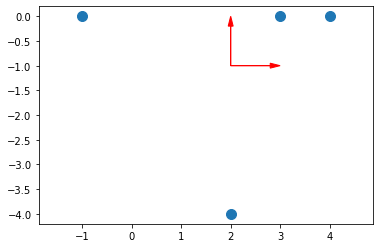

In [10]:
# uncentered
# components are those computed for the centered dataset
# but the starting point is (x_0, y_0), where x_0 and y_0 are the row mean values of X_uncentered
# the ralative positioniing of the points and the principal components should be the same as for the centered dataset
X_uncentered = np.array([[2, 3, 4, -1], [-4, 0, 0, 0]])
plt.scatter(X_uncentered[0,:], X_uncentered[1,:], s=100, marker='o')
plt.arrow(2, -1, U[0][0], U[0][1], color='r', head_length=.2, head_width=.1, length_includes_head=True)
plt.arrow(2, -1, U[1][0], U[1][1], color='r', head_length=.2, head_width=.1, length_includes_head=True)
plt.axis('equal')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


(-2.6940995617925783,
 2.6940995617925783,
 -4.1138451712449084,
 4.115728937155791)

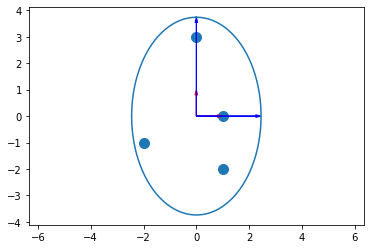

In [11]:
plt.scatter(X[0,:], X[1,:], s=100, marker='o')

plt.arrow(0, 0, U[0][0], U[0][1], color='r', head_length=.2, head_width=.1, length_includes_head=True)
plt.arrow(0, 0, U[1][0], U[1][1], color='r', head_length=.2, head_width=.1, length_includes_head=True)
# Scale the arrows by the singular values
plt.arrow(0, 0, s[0]*U[0][0], s[0]*U[0][1], color='b', head_length=.2, head_width=.1, length_includes_head=True)
plt.arrow(0, 0, s[1]*U[1][0], s[1]*U[1][1], color='b', head_length=.2, head_width=.1, length_includes_head=True)

# Rotation matrix
#phi = -np.pi/4
phi = -np.arctan(U[0][1] / U[0][0])
Mrot = np.array([[np.cos(phi), np.sin(phi)], [-np.sin(phi), np.cos(phi)]])
angle = np.linspace(0, 2 * np.pi, 100)
# Ellipse of needed propotions, but based on main axes
ellipse_coord = np.array([s[0] * np.cos(angle), s[1] * np.sin(angle)])
# Rotation of ellipse
ellipse_rotated = Mrot @ ellipse_coord
plt.plot(ellipse_rotated[0,:], ellipse_rotated[1,:])

plt.axis('equal')

(-6.596828217014066,
 6.5998489627149555,
 -15.398061566177676,
 15.398061566177676)

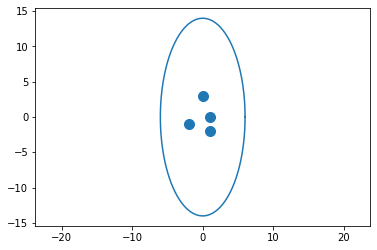

In [12]:
# plotting image of Gramian
# the direction of the main axes is the same, but the lengths are different form those in the previous image
# the reason ia that the lengths of the main axes here are the eigenvalues of the Gramian
# whereas in the previous picture they are the roots thereof
plt.scatter(X[0,:], X[1,:], s=100, marker='o')
UnitCircle = np.array([np.cos(angle), np.sin(angle)])
GramianImage = X @ X.T @ UnitCircle
plt.plot(GramianImage[0,:], GramianImage[1,:])
plt.axis('equal')

O experiments with code for canvas questions

In [13]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([
              [-1, -4, -1, -2], 
              [1, 0, -1, 4], 
])
x_row_means = X.mean(axis=1).reshape([2, 1])
X_centered = X - x_row_means
pca = PCA()
pca.fit_transform(X.T).T
#pca.components_

array([[ 4.3874759e-16, -1.0000000e+00, -2.0000000e+00,  3.0000000e+00],
       [-1.0000000e+00,  2.0000000e+00, -1.0000000e+00,  0.0000000e+00]])

In [14]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([
              [-1, -4, -1, -2], 
              [1, 0, -1, 4], 
])
pca = PCA()
pca.fit_transform(X).T
#pca.components_

array([[-3.74165739e+00,  3.74165739e+00],
       [ 3.14018492e-16,  3.14018492e-16]])

In [15]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([
              [-1, -4, -1, -2], 
              [1, 0, -1, 4], 
])
x_row_means = X.mean(axis=1).reshape([2, 1])
X_centered = X - x_row_means
pca = PCA()
pca.fit_transform(X_centered.T).T
#pca.components_

array([[ 4.3874759e-16, -1.0000000e+00, -2.0000000e+00,  3.0000000e+00],
       [-1.0000000e+00,  2.0000000e+00, -1.0000000e+00,  0.0000000e+00]])

In [16]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([
              [-1, -4, -1, -2], 
              [1, 0, -1, 4], 
])
x_row_means = X.mean(axis=1).reshape([2, 1])
X_centered = X - x_row_means
pca = PCA()
pca.fit_transform(X_centered).T
#pca.components_

array([[ 2.23606798e+00, -2.23606798e+00],
       [ 1.59443643e-16,  1.59443643e-16]])

In [19]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([
              [-1, -4, -1, -2], 
              [1, 0, -1, 4], 
])
pca = PCA()
pca.fit(X.T)
pca.components_

array([[ 0.,  1.],
       [-1., -0.]])